# Training neural network: Data augmentation

Tiếp nối bài thực hành trên lớp, bài tập về nhà này vẫn sử dụng MNIST là tập dữ liệu thử nghiệm. Mục tiêu là cải thiện hiệu suất của mô hình bằng các kỹ thuật Augmentation nhằm tăng cường số lượng dữ liệu

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.datasets import mnist
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

%load_ext tensorboard
!rm -rf './graph/dropout/dropout=0.5,relu/'

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('Training image: ', x_train.shape)
print('Testing image: ', x_test.shape)
print('Training label: ', y_train.shape)
print('Testing label: ', y_test.shape)

Training image:  (60000, 28, 28)
Testing image:  (10000, 28, 28)
Training label:  (60000,)
Testing label:  (10000,)


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255



In [ ]:
class SimpleModel(nn.Module):
    def __init__(self, dropout_rate):
        super(SimpleModel, self).__init__()
        self.dense_1 = nn.Linear(28*28, 128)
        self.dropout = nn.Dropout(dropout_rate)
        self.dense_2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.dense_1(x)
        x = self.relu(x)
        x = self.dropout(x)
        output = F.log_softmax(self.dense_2(x))
        
        return output

# Check model parameter

In [ ]:
simple_model = SimpleModel(dropout_rate = 0.5).cuda()
for param in simple_model.parameters():
    if param.requires_grad:
        print('param autograd')
        break

input = torch.rand(1, 28, 28).cuda()
output = simple_model(input)  # type: torch.Tensor

model_parameters = filter(lambda p: p.requires_grad, simple_model.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
print('Number of parameter:', params)


param autograd
Number of parameter: 101770


## Tăng thêm dữ liệu (data augmentation) với thư viện imgaug

Trong phần thực hành này, chúng ta sẽ làm quen với các phương pháp tăng dữ liệu cho bài toán xử lý ảnh, các phương pháp này hoàn toàn có thể lập trình sử dụng thư viện numpy (vì bản chất của phương pháp là ta thao tác trên ma trận biểu diễn ảnh). Tuy nhiên, để việc lập trình được nhanh chóng, chúng ta sẽ làm quen với một thư viện rất mạnh mẽ, giúp ta nhanh chóng cài đặt nhiều phương pháp tăng dữ liệu hiệu quả khác nhau: thư viện imgaug

Để cài đặt imgaug, ta sử dụng lệnh:

pip install imgaug

pip install scikit-image --upgrade

In [ ]:
# Cài đặt thư viện

######################
### YOUR CODE HERE ###
######################

In [ ]:
from imgaug import augmenters as iaa

Để tìm hiểu lần lượt các phương pháp, thử áp dụng trên ảnh cat.jpg trong thư mục bài thực hành:

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
!ls drive/My\ Drive/AIAcademy/AIAcademyDL02/

In [ ]:
image = cv2.imread('drive/My Drive/AIAcademy/AIAcademyDL02/cat.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


### Các phương pháp thường sử dụng

Các phương pháp hay được sử dụng nhất trong các bài toán xử lý ảnh có thể tham khảo tại: https://imgaug.readthedocs.io/en/latest/source/augmenters.html

1. CropAndPad: Cắt hoặc thêm các pixel vào ảnh.

In [ ]:
# Sử dụng hàm CropAndPad với tham số percent=(-0.25, 0.25)

######################
### YOUR CODE HERE ###
######################

plt.imshow(cv2.cvtColor(crop_and_pad.augment_image(image), cv2.COLOR_BGR2RGB))
plt.show()

2. Flip: Flip left-right hoặc Flip up-down một số ảnh trong tập ảnh truyền vào 

In [ ]:
# Flip left-right sử dụng hàm Fliplr với tham số 1.0

######################
### YOUR CODE HERE ###
######################

plt.imshow(cv2.cvtColor(flip_lr.augment_image(image), cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# Flip up-down sử dụng hàm Flipud với tham số 1.0

######################
### YOUR CODE HERE ###
######################

plt.imshow(cv2.cvtColor(flip_ud.augment_image(image), cv2.COLOR_BGR2RGB))
plt.show()

- Affine: Các phép biến đổi affine như scale, rotate, translate:

In [ ]:
# Biến đổi affine dùng hàm Affine với các tham số scale=(0.5, 1.5), rotate=(-15,15), translate_percent=(-0.2, 0.2)

######################
### YOUR CODE HERE ###
######################

plt.imshow(cv2.cvtColor(affine.augment_image(image), cv2.COLOR_BGR2RGB))
plt.show()

- Blur: Sử dụng các bộ lọc Gaussian hoặc Mean:

In [ ]:
# Sử dụng hàm AverageBlur để thực hiện Mean filter với tham số k = (11,31), GaussianBlur để thực hiện Gausian Blur với Sigma = (5,15)

######################
### YOUR CODE HERE ###
######################

plt.imshow(cv2.cvtColor(avg_blur.augment_image(image), cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(gauss_blur.augment_image(image), cv2.COLOR_BGR2RGB))
plt.show()

- Dropout: Biến đổi ngẫu nhiên một phần ảnh thành các pixel đen 

In [ ]:
# Dropout với tham số p = (0, 0.2) 

######################
### YOUR CODE HERE ###
######################

plt.imshow(cv2.cvtColor(dropout.augment_image(image), cv2.COLOR_BGR2RGB))
plt.show()

### Kết hợp nhiều augmenter

Trong thực tế, có nhiều chiến lược trong việc thực hiện các augmenter khác nhau, thư viện imgaug cũng hỗ trợ một số hàm để thực hiện công việc này:

- Sequential: Áp dụng các augmenter lần lượt theo thứ tự truyền vào:

In [ ]:
aug = iaa.Sequential([
    iaa.Affine(translate_px={"x":(-40, 40)}),
    iaa.AdditiveGaussianNoise(scale=0.1*255)
])

plt.imshow(cv2.cvtColor(aug.augment_image(image), cv2.COLOR_BGR2RGB))
plt.show()

- SomeOf: Áp dụng ngẫu nhiên một vài augmenter trong list các augmenter:

In [ ]:
aug = iaa.SomeOf(2, [
    iaa.Affine(rotate=45),
    iaa.AdditiveGaussianNoise(scale=0.2*255),
    iaa.Add(50, per_channel=True),
    iaa.Sharpen(alpha=0.5)
])

plt.imshow(cv2.cvtColor(aug.augment_image(image), cv2.COLOR_BGR2RGB))
plt.show()

- Sometimes: Áp dụng augmenter với xác suất p:

In [ ]:
aug = iaa.Sometimes(0.5, iaa.GaussianBlur(sigma=20.0))

plt.imshow(cv2.cvtColor(aug.augment_image(image), cv2.COLOR_BGR2RGB))
plt.show()

### Kết hợp cùng thư viện Keras

Bây giờ chúng ta sẽ sử dụng các augmenter đã viết để thực hiện augment image trong quá trình huấn luyện mạng với thư viện Keras. 

- Bước 1: Khởi tạo Augmenter:

In [ ]:
 # Sử dụng hàm Dropout với tham số p=(0, 0.002)

######################
### YOUR CODE HERE ###
######################

- Bước 2: Xây dựng generator:

In [ ]:
class Generator(Dataset):
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels

    def __len__(self):
        return self.images.shape[0]

    def __getitem__(self, idx):
        return self.images[idx], self.labels[idx]

In [ ]:
training_data = Generator(x_train, y_train)
train_dataloader = DataLoader(training_data, batch_size=32, shuffle=True)

In [ ]:
test_data = Generator(x_test, y_test)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=True)

Quan sát thử kết quả của generator bên trên:

torch.Size([32, 28, 28])


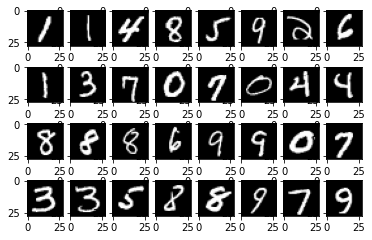

In [ ]:
for (batch_idx, target_tuple) in enumerate(train_dataloader):
    print(target_tuple[0].shape)
    for i in range(32):
        plt.subplot(4, 8, i + 1), plt.imshow(target_tuple[0][i], cmap='gray')
    plt.show()
    break

- Bước 3: Train model với fit_generator:

In [ ]:
use_cuda = torch.cuda.is_available()  #GPU cuda
best_loss = float('inf')

model = SimpleModel(dropout_rate = 0.5)

optimizer = torch.optim.Adadelta(model.parameters())

if use_cuda:
    model = torch.nn.parallel.DataParallel(model.cuda())   # , device_ids=[0, 1, 2, 3]
    torch.backends.cudnn.benchmark = True



In [ ]:
def train(epoch):
    print('\n ############################# Train phase, Epoch: {} #############################'.format(epoch))
    model.train()
    train_loss = 0

    print('\nLearning rate at this epoch is: ', optimizer.param_groups[0]['lr'], '\n')

    for (batch_idx, target_tuple) in enumerate(train_dataloader):
        if use_cuda:
            target_tuple = [target_tensor.cuda(non_blocking=True) for target_tensor in target_tuple]

        images, labels = target_tuple
        # Convert label to long type pytorch
        labels = torch.tensor(labels,dtype=torch.long)

        optimizer.zero_grad()  # zero the gradient buff
        output_tuple = model(images)

        loss = F.nll_loss(output_tuple, labels).cuda()

        loss.backward()  # retain_graph=True
        optimizer.step()

        train_loss += loss.item()  # loss　　　
        print('########################### Epoch:', epoch, ', --  batch:',  batch_idx, '/', len(train_dataloader), ',   ',
              'Train loss: %.3f, accumulated average loss: %.3f ##############################' % (loss.item(), train_loss / (batch_idx + 1)))

    global best_loss
    train_loss /= len(train_dataloader)
    if train_loss < best_loss:
      noti = 'best_'
      best_loss = train_loss
    else:
      noti = ''
    print('saving...')
    state = {
      'weights': model.module.state_dict(),
      'optimizer_weight': optimizer.state_dict(),
      'train_loss': train_loss,
      'epoch': epoch,
    }
    os.makedirs('checkpoints', exist_ok=True)
    torch.save(state, 'checkpoints/model_' + noti + str(epoch) + '_epoch.pth')



In [ ]:
def test(epoch):
    print('\n ############################# Test phase, Epoch: {} #############################'.format(epoch))
    model.eval()
    with torch.no_grad():
        test_loss = 0

        for (batch_idx, target_tuple) in enumerate(test_dataloader):
            if use_cuda:
                target_tuple = [target_tensor.cuda(non_blocking=True) for target_tensor in target_tuple]

            images, labels = target_tuple
            # Convert label to long type pytorch
            labels = torch.tensor(labels,dtype=torch.long)
            output_tuple = model(images)

            loss = F.nll_loss(output_tuple, labels).cuda()

            test_loss += loss.item()  # loss　　　
            print('########################### Epoch:', epoch, ', --  batch:',  batch_idx, '/', len(test_dataloader), ',   ',
                  'Test loss: %.3f, accumulated average loss: %.3f ##############################' % (loss.item(), test_loss / (batch_idx + 1)))



In [ ]:
no_epoch = 5
for epoch in range(no_epoch):
    train(epoch)
    test(epoch)


 ############################# Train phase, Epoch: 0 #############################

Learning rate at this epoch is:  1.0 

########################### Epoch: 0 , --  batch: 0 / 1875 ,    Train loss: 0.025, accumulated average loss: 0.025 ##############################
########################### Epoch: 0 , --  batch: 1 / 1875 ,    Train loss: 0.171, accumulated average loss: 0.098 ##############################
########################### Epoch: 0 , --  batch: 2 / 1875 ,    Train loss: 0.327, accumulated average loss: 0.174 ##############################
########################### Epoch: 0 , --  batch: 3 / 1875 ,    Train loss: 0.068, accumulated average loss: 0.148 ##############################
########################### Epoch: 0 , --  batch: 4 / 1875 ,    Train loss: 0.190, accumulated average loss: 0.156 ##############################
########################### Epoch: 0 , --  batch: 5 / 1875 ,    Train loss: 0.035, accumulated average loss: 0.136 ##############################
